## 2.3.4 Naive Bayes Classification
- BeronoulliNB is for binary classification
- GaussianNB is for continuous data -> save the standard error and average of each feature
- MultinominalNB is for count data(i.e. text data) -> calculate the average of each feature for the class

In [1]:
import sys
import pandas as pd
import mglearn
import matplotlib.pyplot as plt
import numpy as np
import scipy as sp
import IPython 
import sklearn
from sklearn.model_selection import train_test_split

In [2]:
X = np.array([[0, 1, 0, 1],
              [1, 0, 1, 1],
              [0, 0, 0, 1],
              [1, 0, 1, 0,]])
y = np.array([0, 1, 0, 1])

In [3]:
counts = {}
for label in np.unique(y):
    counts[label] = X[y == label].sum(axis=0)
print("feature count: \n", counts)

feature count: 
 {0: array([0, 1, 0, 2]), 1: array([2, 0, 2, 1])}


## 2.3.5 Decision Tree
- yes/no question chain
- make yes/no questions as less as possible

In [6]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, stratify=cancer.target, random_state=42)
tree = DecisionTreeClassifier(random_state=0)
tree.fit(X_train, y_train)

print("training set accuracy: {:.3f}".format(tree.score(X_train, y_train)))
print("test set accuracy: {:.3f}".format(tree.score(X_test, y_test)))

training set accuracy: 1.000
test set accuracy: 0.937


the training set accuracy is 100% but it is overfitted. So we have to pre-pruning

In [17]:
tree = DecisionTreeClassifier(max_depth=4,random_state=0)
tree.fit(X_train, y_train)

print("training set accuracy: {:.3f}".format(tree.score(X_train, y_train)))
print("test set accuracy: {:.3f}".format(tree.score(X_test, y_test)))

training set accuracy: 0.988
test set accuracy: 0.951


In [18]:
from sklearn.tree import export_graphviz
export_graphviz(tree, out_file="tree.dot", class_names=["neg", "pos"],
                feature_names=cancer.feature_names, impurity=False, filled=True)

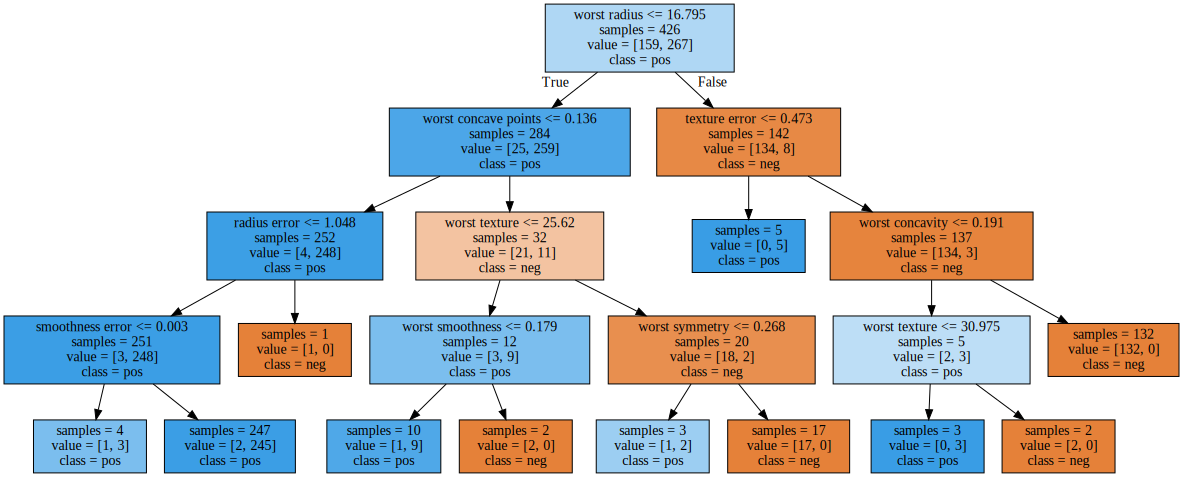

In [19]:
import graphviz
with open("tree.dot") as f:
    dot_graph = f.read()
display(graphviz.Source(dot_graph))

In [21]:
print("feature importances: \n", tree.feature_importances_)

feature importances: 
 [0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.01019737 0.04839825
 0.         0.         0.0024156  0.         0.         0.
 0.         0.         0.72682851 0.0458159  0.         0.
 0.0141577  0.         0.018188   0.1221132  0.01188548 0.        ]


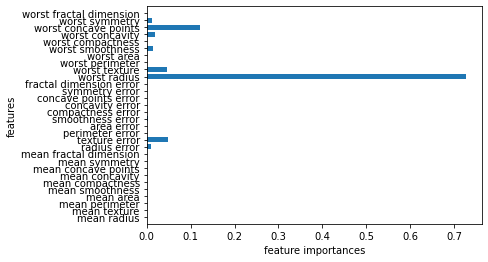

In [22]:
def plot_feature_importances_cancer(model):
    n_features = cancer.data.shape[1]
    plt.barh(np.arange(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), cancer.feature_names)
    plt.xlabel("feature importances")
    plt.ylabel("features")
    plt.ylim(-1, n_features)
    
plot_feature_importances_cancer(tree)
    
    

Feature importances: [0. 1.]


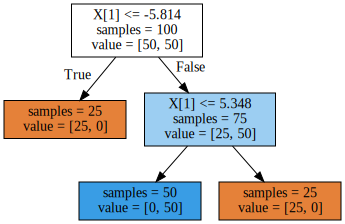

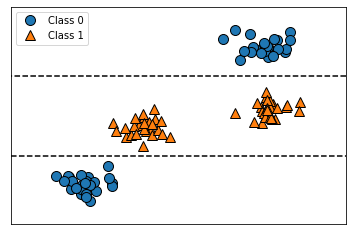

In [23]:
tree = mglearn.plots.plot_tree_not_monotone()
display(tree)

according to the graph above, we cannot say that the higher X[1] would be class 0 or vice versa.

### Regression with decision tree

Text(0, 0.5, 'price($/Mbyte)')

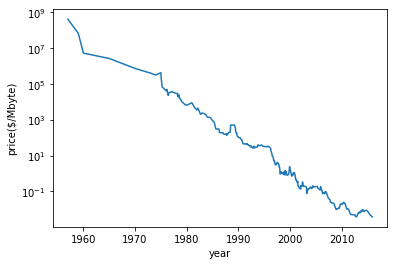

In [26]:
import os
ram_prices = pd.read_csv(os.path.join(mglearn.datasets.DATA_PATH, "ram_price.csv"))

plt.yticks(fontname = "Arial")
plt.semilogy(ram_prices.date, ram_prices.price)
plt.xlabel("year")
plt.ylabel("price($/Mbyte)")

In [29]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression

# before 2000's data is used for training set, after 2000's data is used for test set
data_train = ram_prices[ram_prices.date < 2000]
data_test = ram_prices[ram_prices.date >= 2000]

# Only use date feature for price prediction
X_train = data_train.date[:, np.newaxis]
# convert to log scale to simplify the relation between data and target
y_train = np.log(data_train.price)

tree = DecisionTreeRegressor().fit(X_train, y_train)
linear_reg = LinearRegression().fit(X_train, y_train)

# conduct prediction for all dates
X_all = ram_prices.date[:, np.newaxis]

pred_tree = tree.predict(X_all)
pred_lr = linear_reg.predict(X_all)

# revert the log scale of predicted data 
price_tree = np.exp(pred_tree)
price_lr = np.exp(pred_lr)

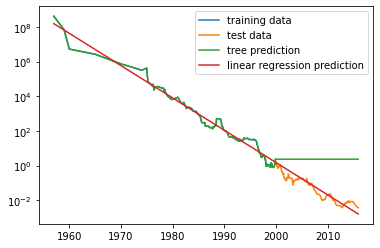

In [31]:
plt.semilogy(data_train.date, data_train.price, label="training data")
plt.semilogy(data_test.date, data_test.price, label="test data")
plt.semilogy(ram_prices.date, price_tree, label="tree prediction")
plt.semilogy(ram_prices.date, price_lr, label="linear regression prediction")
plt.legend()